In [76]:
from advanced_ta import LorentzianClassification
import yfinance as yf
import numpy as np
import pandas as pd

aapl = yf.download('AAPL', start='2010-01-01', end='2024-01-01')
aapl['open'] = aapl['Open']
aapl['high'] = aapl['High']
aapl['low'] = aapl['Low']
aapl['close'] = aapl['Close']
aapl['volume'] = aapl['Volume']
# df here is the dataframe containing stock data as [['open', 'high', 'low', 'close', 'volume']]. Notice that the column names are in lower case.
lc = LorentzianClassification(aapl)


c:\Conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [77]:
lc.data['signal'] = lc.data['signal'].replace(-1, 0)
prediction_array = lc.data['signal']

C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_28652\1788300437.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lc.data['signal'] = lc.data['signal'].replace(-1, 0)


In [78]:

# Download AAPL closing prices
#aapl_closing = yf.download('AAPL', start='2018-01-01', end='2024-01-01')["Close"]
#aapl_closing = pd.read_csv('AAPL_dollar_bars1516.csv')['Close']

# Focus on the last 5% of the period


# Calculate daily returns for the last 5%
actuals_daily_returns = lc.data['close'].pct_change()

# Ensure 'signals' is aligned in size with 'actuals_daily_returns'
# This might involve slicing 'predictions_array' to match the exact period of 'last_five_percent'
signals = prediction_array[-len(actuals_daily_returns):]  # Adjust this line as necessary

# Calculate strategy daily returns
strategy_daily_returns = signals * actuals_daily_returns

strategy_daily_returns = strategy_daily_returns[2000:]
actuals_daily_returns = actuals_daily_returns[2000:]
# Calculate performance metrics
cumulative_return = np.prod(strategy_daily_returns + 1) - 1
negative_returns = strategy_daily_returns[strategy_daily_returns < 0]
downside_deviation = np.sqrt(np.mean(negative_returns ** 2))
expected_return = np.mean(strategy_daily_returns)
risk_free_rate = 0  # Adjust as necessary
sortino_ratio = (expected_return - risk_free_rate) / downside_deviation if downside_deviation != 0 else np.nan

# Display Performance Metrics
print("\nTrading Strategy Performance:")
print(f"Cumulative Return: {cumulative_return * 100:.2f}%")
print(f"Downside Deviation: {downside_deviation:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")


Trading Strategy Performance:
Cumulative Return: 1038.91%
Downside Deviation: 0.0133
Sortino Ratio: 0.1252


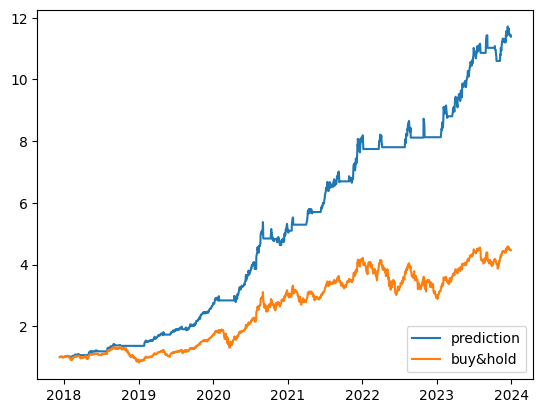

In [80]:
import matplotlib.pyplot as plt
plt.plot((strategy_daily_returns+1).cumprod())
plt.plot((actuals_daily_returns+1).cumprod())
plt.legend(['prediction', 'buy&hold'], loc='lower right')

In [81]:
len(prediction_array),len(signals)


(3522, 3522)